# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore", category=FutureWarning) # silencing future warnings for cleaner presentation

df = pd.read_csv("loan_data.csv")

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


# Age vs. Loan Status

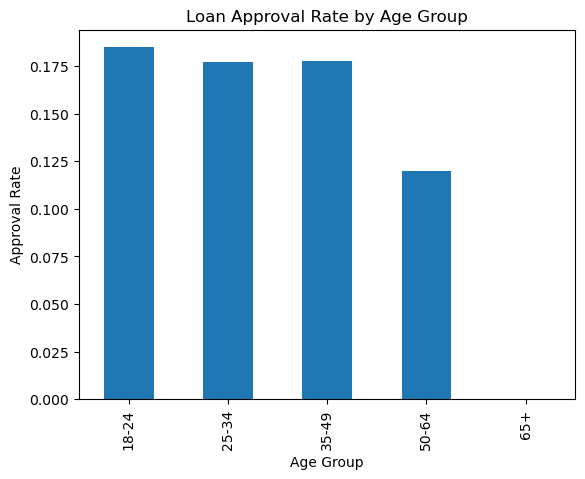

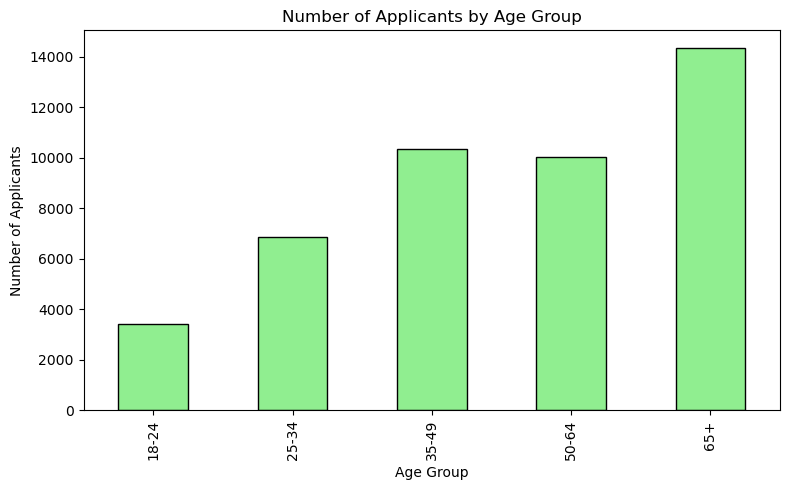

loan_status      0     1
age_group               
18-24         2802   635
25-34         5638  1213
35-49         8523  1842
50-64         8817  1203
65+          14327     0
Chi-squared statistic: 2805.003
p-value: 0.0000


In [35]:
bins = [18, 25, 35, 50, 65, 100]
labels = ['18-24','25-34','35-49','50-64','65+']

# Create age group column once
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)

# 1️⃣ Loan Approval Rate by Age Group
age_status = df.groupby('age_group')['loan_status'].mean()
age_status.plot(kind='bar')
plt.title('Loan Approval Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Approval Rate')
plt.show()

# 2️⃣ Number of Applicants by Age Group
age_group_counts = df['age_group'].value_counts().sort_index()
plt.figure(figsize=(8,5))
age_group_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Applicants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

age_contingency = pd.crosstab(df['age_group'], df['loan_status'])
print(age_contingency)

chi2, p, dof, expected = chi2_contingency(age_contingency)

print(f"Chi-squared statistic: {chi2:.3f}")
print(f"p-value: {p:.4f}")

## Conclusion
It is a bias against those 50 and older, which is increased once the applicant reaches 65 years old. This could indicate age discrimination and opens the company up to legal issues arising from this.

# Gender vs. Loan Status

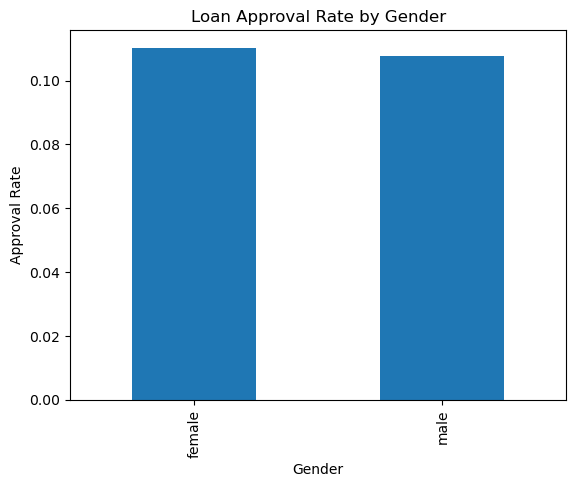

loan_status        0     1
person_gender             
female         15934  1975
male           24173  2918
Chi-squared statistic: 0.708
p-value: 0.4002


In [16]:
gender_status = df.groupby('person_gender')['loan_status'].mean()
gender_status.plot(kind='bar')
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Approval Rate')
plt.show()

contingency = pd.crosstab(df['person_gender'], df['loan_status'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic: {chi2:.3f}")
print(f"p-value: {p:.4f}")


## Conclusion
There is a slight bias towards females, but there is no statistically significant data to say it is anything other than normal variation

# Education vs. Loan Status

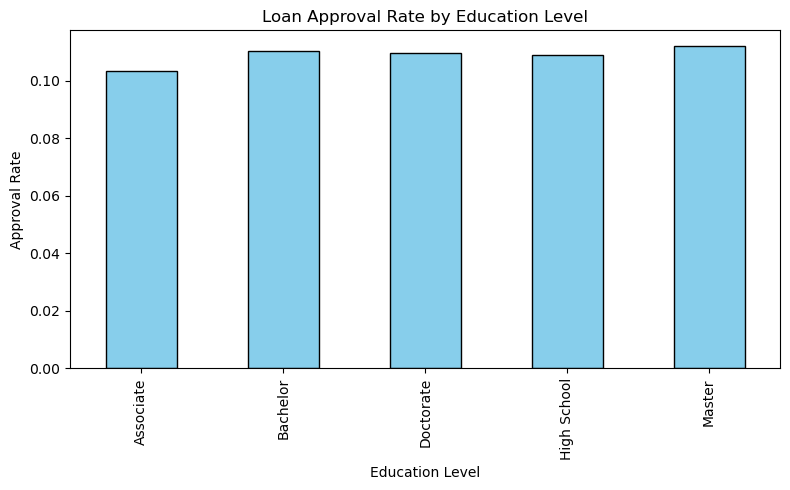

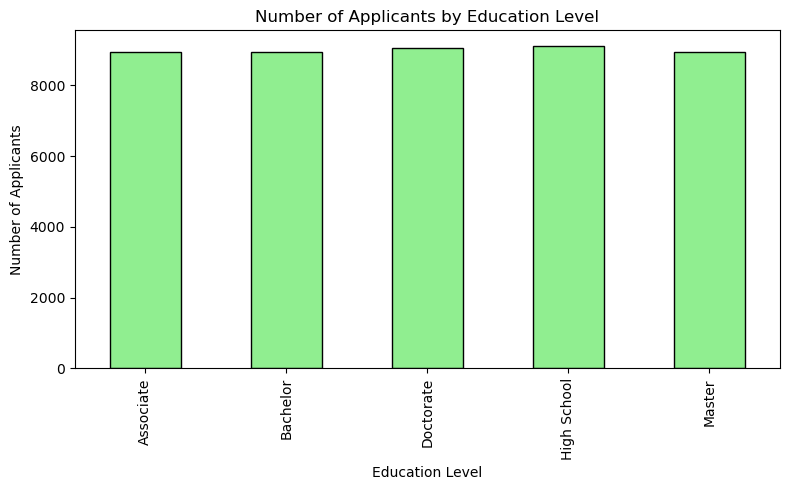

In [18]:
edu_approval = df.groupby('person_education')['loan_status'].mean()

plt.figure(figsize=(8,5))
edu_approval.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

# 2️⃣ Number of applicants by education level
edu_counts = df['person_education'].value_counts()
# Ensure same order as approval rate plot
edu_counts = edu_counts.reindex(edu_approval.index)

plt.figure(figsize=(8,5))
edu_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Applicants by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Applicants')
plt.tight_layout()
plt.show()

## Conclusion
There is nothing here to signify bias based on education level.

# Income vs. Loan Status

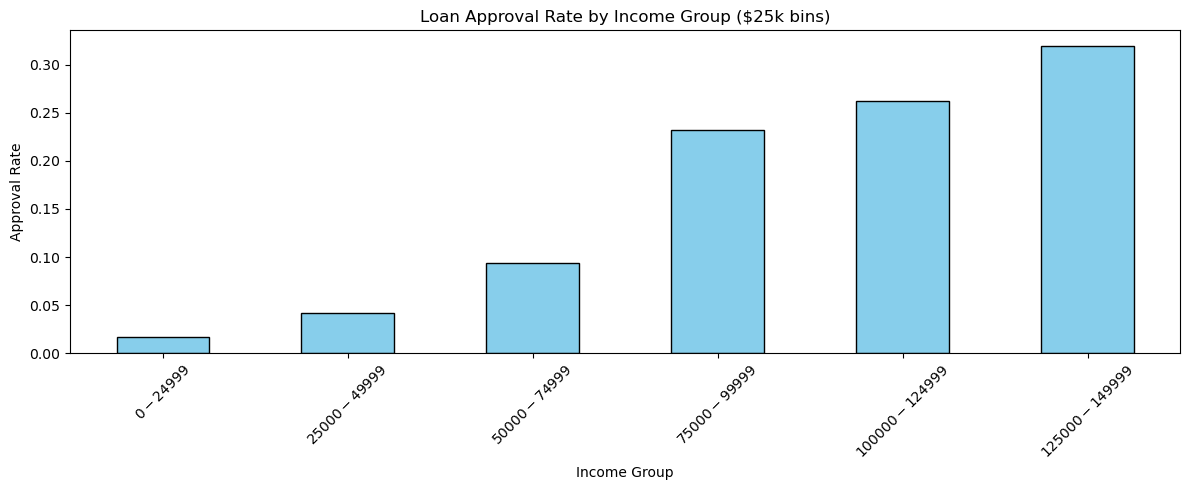

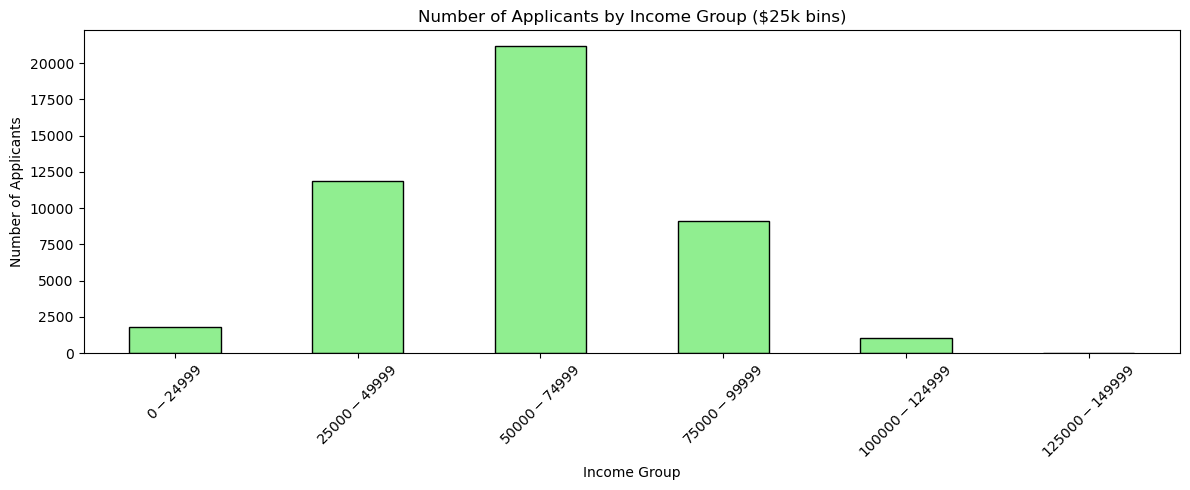

In [23]:
# --- Step 1: Define $25k bins and labels ---
max_income = df['person_income'].max()
bins = list(range(0, int(max_income + 25000), 25000))
labels = [f"${bins[i]}-${bins[i+1]-1}" for i in range(len(bins)-1)]

df['income_group'] = pd.cut(df['person_income'], bins=bins, labels=labels, right=False)

# --- Step 2: Approval rate per income group ---
income_approval = df.groupby('income_group')['loan_status'].mean()

# --- Step 3: Number of applicants per income group ---
income_counts = df['income_group'].value_counts().reindex(income_approval.index)

# --- Step 4: Plot approval rate ---
plt.figure(figsize=(12,5))
income_approval.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Approval Rate by Income Group ($25k bins)')
plt.xlabel('Income Group')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 5: Plot number of applicants ---
plt.figure(figsize=(12,5))
income_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Applicants by Income Group ($25k bins)')
plt.xlabel('Income Group')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion
While it appears there is a bias towards people with more money (there is) it is justifiable by the fact that we are financing big ticket items, namely homes, and want to ensure we're going to get our money back.

# Employment Experience vs. Loan Status

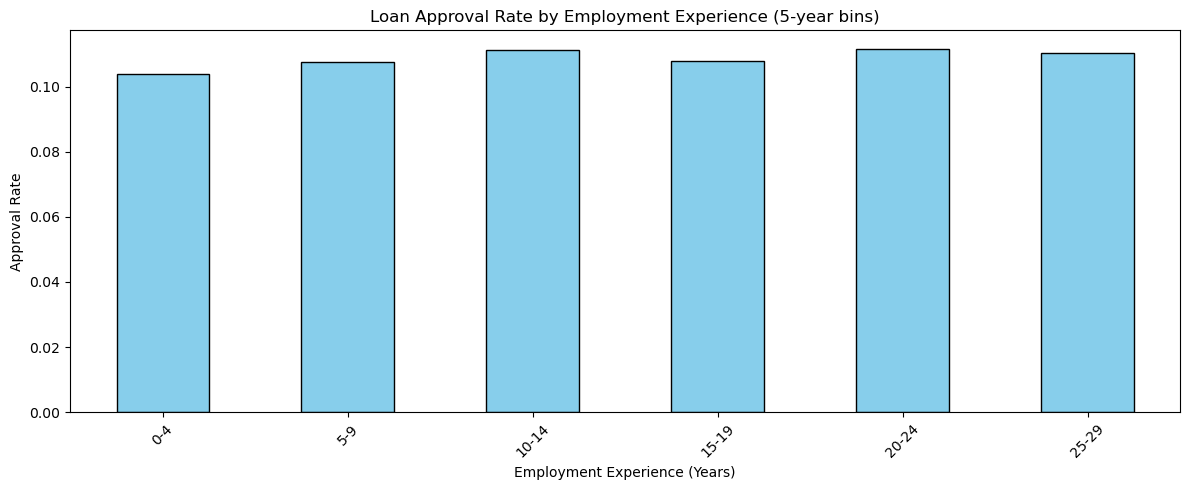

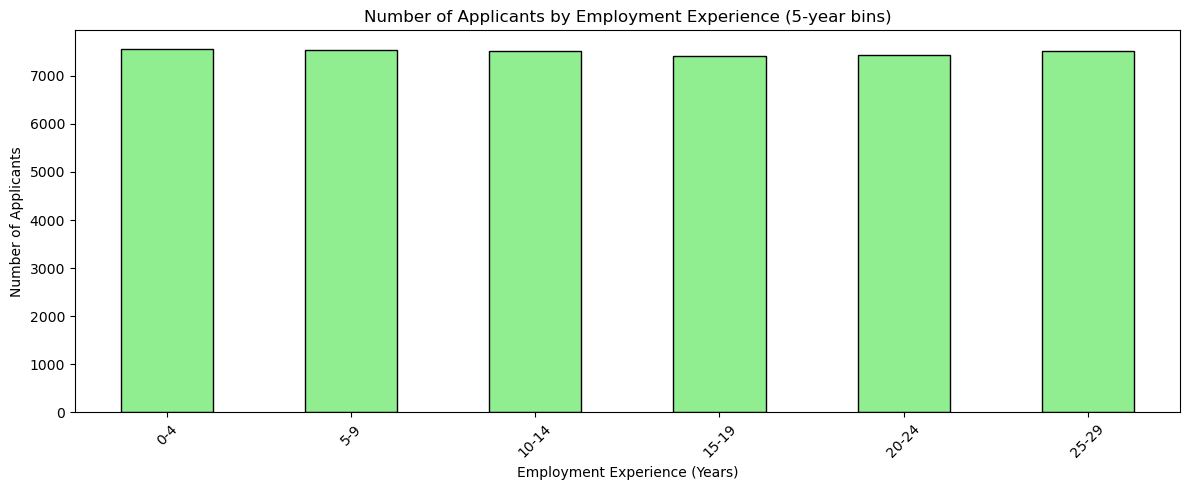

In [29]:
# --- Step 1: Define 5-year bins for employment experience ---
max_exp = df['person_emp_exp'].max()
bins = list(range(0, int(max_exp + 5), 5))  # 0, 5, 10, ...
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

df['emp_exp_group'] = pd.cut(df['person_emp_exp'], bins=bins, labels=labels, right=False)

# --- Step 2: Loan approval rate per experience group ---
emp_approval = df.groupby('emp_exp_group')['loan_status'].mean()

# --- Step 3: Number of applicants per experience group ---
emp_counts = df['emp_exp_group'].value_counts().reindex(emp_approval.index)

# --- Step 4: Plot approval rate ---
plt.figure(figsize=(12,5))
emp_approval.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Approval Rate by Employment Experience (5-year bins)')
plt.xlabel('Employment Experience (Years)')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 5: Plot number of applicants ---
plt.figure(figsize=(12,5))
emp_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Applicants by Employment Experience (5-year bins)')
plt.xlabel('Employment Experience (Years)')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion
There appears to be no bias towards more or less employment experience when approving the loans. No legal issues here.

# Length of Credit Histor vs. Loan Status

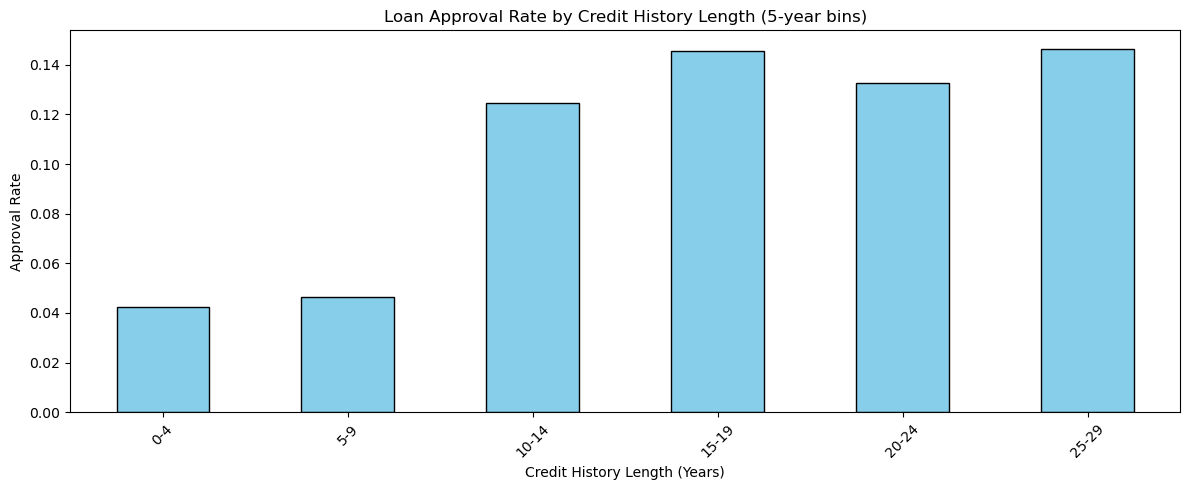

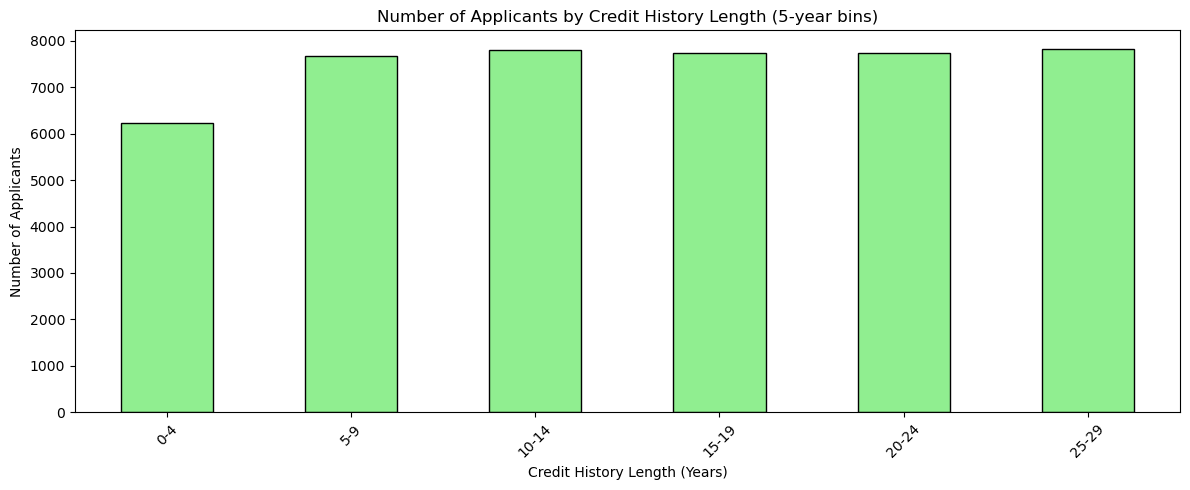

In [31]:
# --- Step 1: Define 5-year bins for credit history ---
max_cred = df['cb_person_cred_hist_length'].max()
bins = list(range(0, int(max_cred + 5), 5))  # 0, 5, 10, 15, ...
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

df['cred_hist_group'] = pd.cut(df['cb_person_cred_hist_length'], bins=bins, labels=labels, right=False)

# --- Step 2: Loan approval rate per credit history group ---
cred_approval = df.groupby('cred_hist_group')['loan_status'].mean()

# --- Step 3: Number of applicants per credit history group ---
cred_counts = df['cred_hist_group'].value_counts().reindex(cred_approval.index)

# --- Step 4: Plot approval rate ---
plt.figure(figsize=(12,5))
cred_approval.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Approval Rate by Credit History Length (5-year bins)')
plt.xlabel('Credit History Length (Years)')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 5: Plot number of applicants ---
plt.figure(figsize=(12,5))
cred_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Applicants by Credit History Length (5-year bins)')
plt.xlabel('Credit History Length (Years)')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion
There is an acceptable bias towards a longer credit history, upto 15 years. This is acceptable because a longer history give a greater indicator that the debt will be paid.

# Credit Score vs. Loan Status

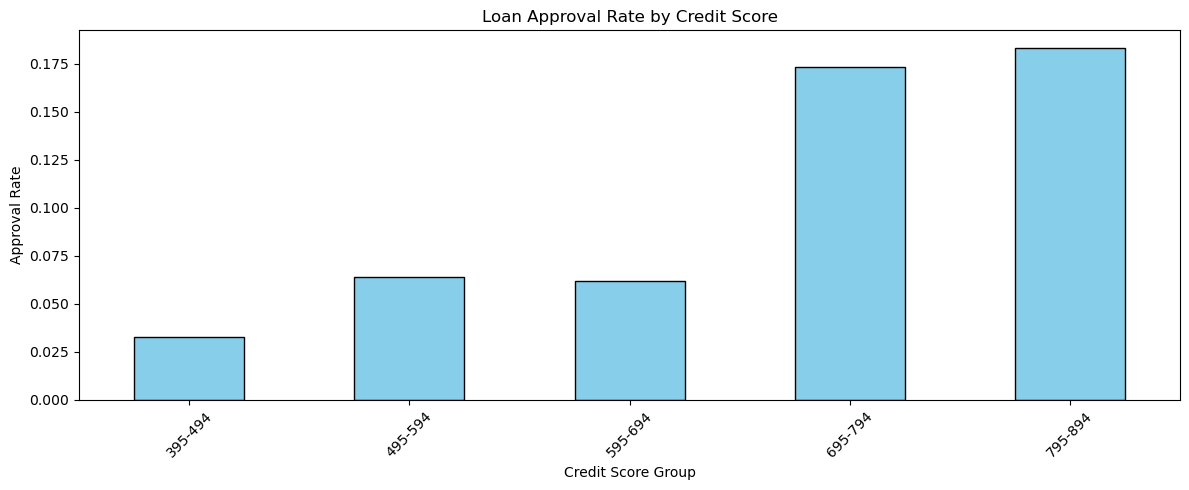

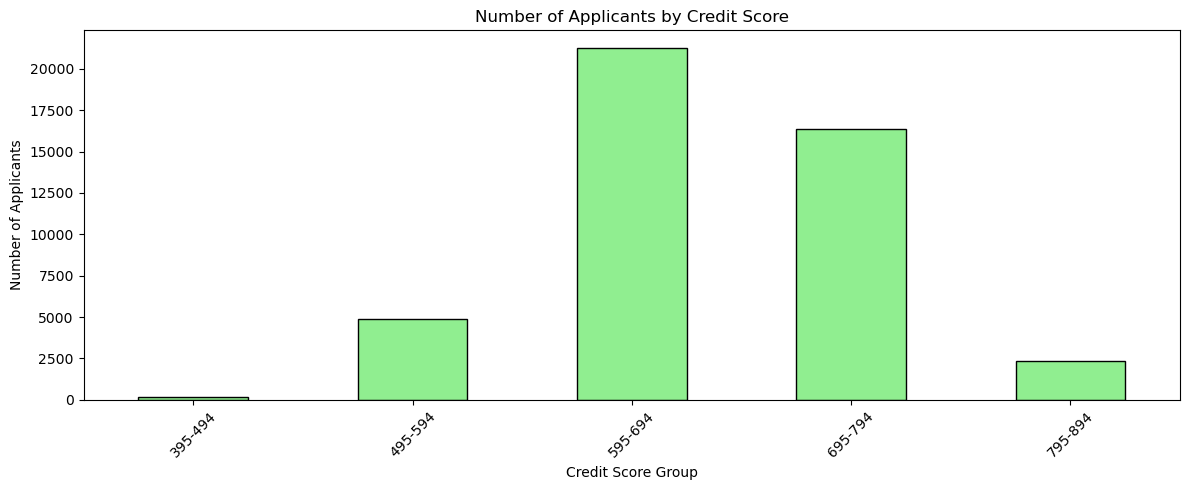

In [33]:
# --- Step 1: Define bins for credit score (50-point intervals) ---
min_score = int(df['credit_score'].min())
max_score = int(df['credit_score'].max())
bins = list(range(min_score, max_score + 100,100))  # 100-point bins
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Create credit score group column
df['credit_score_group'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)

# --- Step 2: Approval rate per credit score group ---
score_approval = df.groupby('credit_score_group')['loan_status'].mean()

# --- Step 3: Number of applicants per credit score group ---
score_counts = df['credit_score_group'].value_counts().reindex(score_approval.index)

# --- Step 4: Plot approval rate ---
plt.figure(figsize=(12,5))
score_approval.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Approval Rate by Credit Score')
plt.xlabel('Credit Score Group')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 5: Plot number of applicants ---
plt.figure(figsize=(12,5))
score_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Applicants by Credit Score')
plt.xlabel('Credit Score Group')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion
There is acceptable bias towards higher credit scores. Given the number of applicants for each score range, it seems our customers are very cognizant of their credit score and have a good idea of the minimum we are looking for.

# Final Conclusion:
There are obvious biases shown in various criteria, some of which are acceptable, given the business we conduct. I've included statistical analyses in the area where we may run into legal trouble, namely the age and gender categories. While there is no statistical significance between the genders for loan approval, there is no statistical doubt that we will run into legal troubles with our current age criteria.